# Premier League Project

In [404]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [405]:
path_form = r"C:\Users\georg\OneDrive\Desktop\Premier league data\prem_form.csv"
path_h2h = r"C:\Users\georg\OneDrive\Desktop\Premier league data\prem_h2h.csv"
path_placements = r"C:\Users\georg\OneDrive\Desktop\Premier league data\prem_placements.csv"
path_squad_values = r"C:\Users\georg\OneDrive\Desktop\Premier league data\prem_squad_values.csv"
path_transfers = r"C:\Users\georg\OneDrive\Desktop\Premier league data\prem_transfers.csv"

form = pd.read_csv(path_form)
h2h = pd.read_csv(path_h2h)
placements = pd.read_csv(path_placements)
squad_values = pd.read_csv(path_squad_values)
transfers = pd.read_csv(path_transfers)

## Data Cleaning

##### Form Dataset

In [406]:
form

,Position,Club,P,W,D,L,GF,GA,GD,PTS
0,1,Manchester City,13,9,1,3,40,11,29,28
1,2,Liverpool,13,8,2,3,30,23,7,26
2,3,Tottenham Hotspur,13,7,4,2,26,12,14,25
3,4,Chelsea,13,8,1,4,28,21,7,25
4,5,Arsenal,14,8,1,5,24,17,7,25
5,6,Manchester United,12,7,3,2,27,17,10,24
6,7,Southampton,13,7,3,3,21,14,7,24
7,8,Everton,13,7,3,3,19,15,4,24
8,9,Wolves,13,7,1,5,14,13,1,22
9,10,Aston Villa,13,5,4,4,18,13,5,19


In [407]:
form["Club"].replace({"Tottenham Hotspur": "Tottenham", 
                     "West Ham United": "West Ham", 
                     "Leicester City": "Leicester", 
                     "Newcastle United": "Newcastle", 
                     "Brighton & Hove Albion": "Brighton"}, inplace = True)

form.rename(columns = {"Club": "Club Name"}, inplace = True)

In [408]:
form.dtypes

Position      int64
Club Name    object
P             int64
W             int64
D             int64
L             int64
GF            int64
GA            int64
GD            int64
PTS           int64
dtype: object

In [409]:
form["PPG"] = round(form["PTS"] / form["P"], 2)
form

,Position,Club Name,P,W,D,L,GF,GA,GD,PTS,PPG
0,1,Manchester City,13,9,1,3,40,11,29,28,2.15
1,2,Liverpool,13,8,2,3,30,23,7,26,2.00
2,3,Tottenham,13,7,4,2,26,12,14,25,1.92
3,4,Chelsea,13,8,1,4,28,21,7,25,1.92
4,5,Arsenal,14,8,1,5,24,17,7,25,1.79
5,6,Manchester United,12,7,3,2,27,17,10,24,2.00
6,7,Southampton,13,7,3,3,21,14,7,24,1.85
7,8,Everton,13,7,3,3,19,15,4,24,1.85
8,9,Wolves,13,7,1,5,14,13,1,22,1.69
9,10,Aston Villa,13,5,4,4,18,13,5,19,1.46


In [410]:
form = form.sort_values("PPG", ascending = False)
form

,Position,Club Name,P,W,D,L,GF,GA,GD,PTS,PPG
0,1,Manchester City,13,9,1,3,40,11,29,28,2.15
5,6,Manchester United,12,7,3,2,27,17,10,24,2.00
1,2,Liverpool,13,8,2,3,30,23,7,26,2.00
2,3,Tottenham,13,7,4,2,26,12,14,25,1.92
3,4,Chelsea,13,8,1,4,28,21,7,25,1.92
6,7,Southampton,13,7,3,3,21,14,7,24,1.85
7,8,Everton,13,7,3,3,19,15,4,24,1.85
4,5,Arsenal,14,8,1,5,24,17,7,25,1.79
17,18,Leeds,4,2,1,1,9,8,1,7,1.75
8,9,Wolves,13,7,1,5,14,13,1,22,1.69


In [411]:
form.reset_index(drop = True, inplace = True)
form

,Position,Club Name,P,W,D,L,GF,GA,GD,PTS,PPG
0,1,Manchester City,13,9,1,3,40,11,29,28,2.15
1,6,Manchester United,12,7,3,2,27,17,10,24,2.00
2,2,Liverpool,13,8,2,3,30,23,7,26,2.00
3,3,Tottenham,13,7,4,2,26,12,14,25,1.92
4,4,Chelsea,13,8,1,4,28,21,7,25,1.92
5,7,Southampton,13,7,3,3,21,14,7,24,1.85
6,8,Everton,13,7,3,3,19,15,4,24,1.85
7,5,Arsenal,14,8,1,5,24,17,7,25,1.79
8,18,Leeds,4,2,1,1,9,8,1,7,1.75
9,9,Wolves,13,7,1,5,14,13,1,22,1.69


In [412]:
form.at[0, "Position"] = 1
form.at[1, "Position"] = 2
form.at[2, "Position"] = 3
form.at[3, "Position"] = 4
form.at[4, "Position"] = 5
form.at[5, "Position"] = 6
form.at[6, "Position"] = 7
form.at[7, "Position"] = 8
form.at[8, "Position"] = 9
form.at[9, "Position"] = 10
form.at[10, "Position"] = 11
form.at[11, "Position"] = 12
form.at[12, "Position"] = 13
form.at[13, "Position"] = 14
form.at[14, "Position"] = 15
form.at[15, "Position"] = 16
form.at[16, "Position"] = 17
form.at[17, "Position"] = 18
form.at[18, "Position"] = 19
form.at[19, "Position"] = 20

In [413]:
form.set_index("Club Name", inplace = True)

In [414]:
form

,Position,P,W,D,L,GF,GA,GD,PTS,PPG
Club Name,,,,,,,,,,
Manchester City,1,13,9,1,3,40,11,29,28,2.15
Manchester United,2,12,7,3,2,27,17,10,24,2.00
Liverpool,3,13,8,2,3,30,23,7,26,2.00
Tottenham,4,13,7,4,2,26,12,14,25,1.92
Chelsea,5,13,8,1,4,28,21,7,25,1.92
Southampton,6,13,7,3,3,21,14,7,24,1.85
Everton,7,13,7,3,3,19,15,4,24,1.85
Arsenal,8,14,8,1,5,24,17,7,25,1.79
Leeds,9,4,2,1,1,9,8,1,7,1.75


##### h2h Dataset

In [415]:
h2h.head()

,Club,Manchester City,Manchester United,Liverpool,Tottenham Hotspur,Chelsea,Arsenal,Total
0,Manchester City,NaN,5.0,3.0,4.0,6.0,7.0,25
1,Manchester United,4.0,NaN,3.0,5.0,4.0,3.0,19
2,Liverpool,5.0,2.0,NaN,5.0,5.0,5.0,22
3,Tottenham Hotspur,4.0,4.0,1.0,NaN,3.0,3.0,15
4,Chelsea,4.0,2.0,1.0,5.0,NaN,5.0,17


In [416]:
h2h.rename(columns = {"Club ": "Club Name",
                     "Manchester City": "vs Manchester City", 
                     "Manchester United": "vs Manchester United", 
                     "Liverpool ": "vs Liverpool", 
                     "Tottenham Hotspur": "vs Tottenham", 
                     "Chelsea": "vs Chelsea", 
                     "Arsenal": "vs Arsenal"}, inplace = True)

In [417]:
h2h

,Club Name,vs Manchester City,vs Manchester United,vs Liverpool,vs Tottenham,vs Chelsea,vs Arsenal,Total
0,Manchester City,NaN,5.0,3.0,4.0,6.0,7.0,25
1,Manchester United,4.0,NaN,3.0,5.0,4.0,3.0,19
2,Liverpool,5.0,2.0,NaN,5.0,5.0,5.0,22
3,Tottenham Hotspur,4.0,4.0,1.0,NaN,3.0,3.0,15
4,Chelsea,4.0,2.0,1.0,5.0,NaN,5.0,17
5,Arsenal,1.0,4.0,1.0,2.0,2.0,NaN,10


In [418]:
h2h["Club Name"].replace({"Manchester City": "Manchester City", 
                     "Manchester United": "Manchester United", 
                     "Tottenham Hotspur": "Tottenham"}, inplace = True)

In [419]:
h2h

,Club Name,vs Manchester City,vs Manchester United,vs Liverpool,vs Tottenham,vs Chelsea,vs Arsenal,Total
0,Manchester City,NaN,5.0,3.0,4.0,6.0,7.0,25
1,Manchester United,4.0,NaN,3.0,5.0,4.0,3.0,19
2,Liverpool,5.0,2.0,NaN,5.0,5.0,5.0,22
3,Tottenham,4.0,4.0,1.0,NaN,3.0,3.0,15
4,Chelsea,4.0,2.0,1.0,5.0,NaN,5.0,17
5,Arsenal,1.0,4.0,1.0,2.0,2.0,NaN,10


In [420]:
h2h.set_index("Club Name", inplace = True)

In [421]:
h2h.fillna(0, inplace = True)
h2h

,vs Manchester City,vs Manchester United,vs Liverpool,vs Tottenham,vs Chelsea,vs Arsenal,Total
Club Name,,,,,,,
Manchester City,0.0,5.0,3.0,4.0,6.0,7.0,25
Manchester United,4.0,0.0,3.0,5.0,4.0,3.0,19
Liverpool,5.0,2.0,0.0,5.0,5.0,5.0,22
Tottenham,4.0,4.0,1.0,0.0,3.0,3.0,15
Chelsea,4.0,2.0,1.0,5.0,0.0,5.0,17
Arsenal,1.0,4.0,1.0,2.0,2.0,0.0,10


In [422]:
h2h["vs Manchester City"] = h2h["vs Manchester City"].astype(int)
h2h["vs Manchester United"] = h2h["vs Manchester United"].astype(int)
h2h["vs Liverpool"] = h2h["vs Liverpool"].astype(int)
h2h["vs Tottenham"] = h2h["vs Tottenham"].astype(int)
h2h["vs Chelsea"] = h2h["vs Chelsea"].astype(int)
h2h["vs Arsenal"] = h2h["vs Arsenal"].astype(int)
h2h["Total"] = h2h["Total"].astype(int)

In [423]:
h2h

,vs Manchester City,vs Manchester United,vs Liverpool,vs Tottenham,vs Chelsea,vs Arsenal,Total
Club Name,,,,,,,
Manchester City,0,5,3,4,6,7,25
Manchester United,4,0,3,5,4,3,19
Liverpool,5,2,0,5,5,5,22
Tottenham,4,4,1,0,3,3,15
Chelsea,4,2,1,5,0,5,17
Arsenal,1,4,1,2,2,0,10


##### Placements  dataset

In [424]:
placements

,Club Name,19/20 placement,18/19 placement,17/18 placement,16/17 placement,15/16 placement
0,Arsenal,8.0,5.0,6.0,5.0,2.0
1,Aston Villa,17.0,NaN,NaN,NaN,20.0
2,Brighton and Hove Albion,15.0,17.0,15.0,NaN,NaN
3,Burnley,10.0,15.0,7.0,16.0,NaN
4,Chelsea,4.0,3.0,5.0,1.0,10.0
5,Crystal Palace,14.0,12.0,11.0,14.0,15.0
6,Everton,12.0,8.0,8.0,7.0,11.0
7,Fulham,NaN,19.0,NaN,NaN,NaN
8,Leeds United,NaN,NaN,NaN,NaN,NaN
9,Leicester City,5.0,9.0,9.0,12.0,1.0


In [425]:
placements.at[8, "19/20 placement"] = 21.0
placements.at[7, "19/20 placement"] = 24.0
placements.at[17, "19/20 placement"] = 22.0

placements.at[1, "18/19 placement"] = 25.0
placements.at[8, "18/19 placement"] = 23.0
placements.at[14, "18/19 placement"] = 22.0
placements.at[17, "18/19 placement"] = 24.0

placements.at[1, "17/18 placement"] = 24.0
placements.at[7, "17/18 placement"] = 23.0
placements.at[8, "17/18 placement"] = 33.0
placements.at[14, "17/18 placement"] = 30.0
placements.at[19, "17/18 placement"] = 21.0

placements.at[1, "16/17 placement"] = 24.0
placements.at[2, "16/17 placement"] = 22.0
placements.at[7, "16/17 placement"] = 26.0
placements.at[8, "16/17 placement"] = 27.0
placements.at[13, "16/17 placement"] = 21.0
placements.at[14, "16/17 placement"] = 45.0
placements.at[19, "16/17 placement"] = 35.0

placements.at[2, "15/16 placement"] = 23.0
placements.at[3, "15/16 placement"] = 21.0
placements.at[7, "15/16 placement"] = 40.0
placements.at[8, "15/16 placement"] = 33.0
placements.at[14, "15/16 placement"] = 56.0
placements.at[19, "15/16 placement"] = 34.0

In [426]:
placements

,Club Name,19/20 placement,18/19 placement,17/18 placement,16/17 placement,15/16 placement
0,Arsenal,8.0,5.0,6.0,5.0,2.0
1,Aston Villa,17.0,25.0,24.0,24.0,20.0
2,Brighton and Hove Albion,15.0,17.0,15.0,22.0,23.0
3,Burnley,10.0,15.0,7.0,16.0,21.0
4,Chelsea,4.0,3.0,5.0,1.0,10.0
5,Crystal Palace,14.0,12.0,11.0,14.0,15.0
6,Everton,12.0,8.0,8.0,7.0,11.0
7,Fulham,24.0,19.0,23.0,26.0,40.0
8,Leeds United,21.0,23.0,33.0,27.0,33.0
9,Leicester City,5.0,9.0,9.0,12.0,1.0


In [427]:
placements["Club Name"].replace({"Wolverhampton Wanderers": "Wolves", 
                               "West Brom Albion": "West Brom", 
                               "Tottenham Hotspur": "Tottenham",
                               "West Ham United": "West Ham", 
                               "Leicester City": "Leicester", 
                               "Brighton and Hove Albion": "Brighton", 
                               "Newcastle United": "Newcastle", 
                                "Leeds United": "Leeds"}, inplace = True)  #Leeds United replacement NW

In [428]:
placements.at[8, "Club Name"] = "Leeds"
placements.at[0, "Club Name"] = "Arsenal"
placements.at[1, "Club Name"] = "Aston Villa"

In [429]:
placements

,Club Name,19/20 placement,18/19 placement,17/18 placement,16/17 placement,15/16 placement
0,Arsenal,8.0,5.0,6.0,5.0,2.0
1,Aston Villa,17.0,25.0,24.0,24.0,20.0
2,Brighton,15.0,17.0,15.0,22.0,23.0
3,Burnley,10.0,15.0,7.0,16.0,21.0
4,Chelsea,4.0,3.0,5.0,1.0,10.0
5,Crystal Palace,14.0,12.0,11.0,14.0,15.0
6,Everton,12.0,8.0,8.0,7.0,11.0
7,Fulham,24.0,19.0,23.0,26.0,40.0
8,Leeds,21.0,23.0,33.0,27.0,33.0
9,Leicester,5.0,9.0,9.0,12.0,1.0


In [430]:
placements.set_index("Club Name", inplace = True)
placements

,19/20 placement,18/19 placement,17/18 placement,16/17 placement,15/16 placement
Club Name,,,,,
Arsenal,8.0,5.0,6.0,5.0,2.0
Aston Villa,17.0,25.0,24.0,24.0,20.0
Brighton,15.0,17.0,15.0,22.0,23.0
Burnley,10.0,15.0,7.0,16.0,21.0
Chelsea,4.0,3.0,5.0,1.0,10.0
Crystal Palace,14.0,12.0,11.0,14.0,15.0
Everton,12.0,8.0,8.0,7.0,11.0
Fulham,24.0,19.0,23.0,26.0,40.0
Leeds,21.0,23.0,33.0,27.0,33.0


In [431]:
placements["19/20 placement"] = placements["19/20 placement"].astype(int)
placements["18/19 placement"] = placements["18/19 placement"].astype(int)
placements["17/18 placement"] = placements["17/18 placement"].astype(int)
placements["16/17 placement"] = placements["16/17 placement"].astype(int)
placements["15/16 placement"] = placements["15/16 placement"].astype(int)

In [432]:
placements

,19/20 placement,18/19 placement,17/18 placement,16/17 placement,15/16 placement
Club Name,,,,,
Arsenal,8,5,6,5,2
Aston Villa,17,25,24,24,20
Brighton,15,17,15,22,23
Burnley,10,15,7,16,21
Chelsea,4,3,5,1,10
Crystal Palace,14,12,11,14,15
Everton,12,8,8,7,11
Fulham,24,19,23,26,40
Leeds,21,23,33,27,33


In [433]:
placements["Average position"] = (placements["19/20 placement"] + placements["18/19 placement"] + 
                                  placements["17/18 placement"] + placements["16/17 placement"] +
                                  placements["15/16 placement"]) / 5
placements

,19/20 placement,18/19 placement,17/18 placement,16/17 placement,15/16 placement,Average position
Club Name,,,,,,
Arsenal,8,5,6,5,2,5.2
Aston Villa,17,25,24,24,20,22.0
Brighton,15,17,15,22,23,18.4
Burnley,10,15,7,16,21,13.8
Chelsea,4,3,5,1,10,4.6
Crystal Palace,14,12,11,14,15,13.2
Everton,12,8,8,7,11,9.2
Fulham,24,19,23,26,40,26.4
Leeds,21,23,33,27,33,27.4


In [434]:
placements.sort_values("Average position", ascending = True)

,19/20 placement,18/19 placement,17/18 placement,16/17 placement,15/16 placement,Average position
Club Name,,,,,,
Manchester City,2,1,1,3,4,2.2
Tottenham,6,4,3,2,3,3.6
Liverpool,1,2,4,4,8,3.8
Manchester United,3,6,2,6,5,4.4
Chelsea,4,3,5,1,10,4.6
Arsenal,8,5,6,5,2,5.2
Leicester,5,9,9,12,1,7.2
Everton,12,8,8,7,11,9.2
West Ham,16,10,13,11,7,11.4


##### Squad values dataset

In [435]:
squad_values

,Club name,squad value 20/21,squad value 19/20,squad value 18/19,squad value rank 20/21,squad value rank 19/20,squad value rank 18/19,squad value rank 17/18,squad value rank 16/17,squad value rank 15/16
0,Arsenal,562.46,612.50,533.97,6,6,6,3,4,3
1,Aston Villa,242.91,166.14,124.29,10,16,18,15,13,13
2,Brighton,169.97,203.24,155.39,16,14,15,14,18,17
3,Burnley,139.34,185.02,167.18,19,15,14,16,17,15
4,Chelsea,749.32,717.30,941.63,3,4,2,1,2,1
5,Palace,182.27,223.79,236.14,15,13,11,11,9,11
6,Everton,424.67,472.95,386.55,7,7,7,7,7,7
7,Fulham,189.05,143.03,215.55,14,17,12,18,16,16
8,Leeds,147.29,96.41,70.64,17,19,19,19,19,19
9,Leicester,410.04,345.83,296.10,8,8,8,9,11,14


In [436]:
squad_values.rename(columns = {"Club name": "Club Name", 
                              "squad value 20/21": "Squad Value 20/21 (M)(£)", 
                              "squad value 19/20": "Squad Value 19/20 (M)(£)", 
                              "squad value 18/19": "Squad Value 18/19 (M)(£)", 
                              "squad value rank 20/21": "Squad Value Rank 20/21",
                              "squad value rank 19/20": "Squad Value Rank 19/20",
                              "squad value rank 18/19": "Squad Value Rank 18/19",
                              "squad value rank 17/18": "Squad Value Rank 17/18",
                              "squad value rank 16/17": "Squad Value Rank 16/17",
                              "squad value rank 15/16": "Squad Value Rank 15/16"}, inplace = True)

squad_values

,Club Name,Squad Value 20/21 (M)(£),Squad Value 19/20 (M)(£),Squad Value 18/19 (M)(£),Squad Value Rank 20/21,Squad Value Rank 19/20,Squad Value Rank 18/19,Squad Value Rank 17/18,Squad Value Rank 16/17,Squad Value Rank 15/16
0,Arsenal,562.46,612.50,533.97,6,6,6,3,4,3
1,Aston Villa,242.91,166.14,124.29,10,16,18,15,13,13
2,Brighton,169.97,203.24,155.39,16,14,15,14,18,17
3,Burnley,139.34,185.02,167.18,19,15,14,16,17,15
4,Chelsea,749.32,717.30,941.63,3,4,2,1,2,1
5,Palace,182.27,223.79,236.14,15,13,11,11,9,11
6,Everton,424.67,472.95,386.55,7,7,7,7,7,7
7,Fulham,189.05,143.03,215.55,14,17,12,18,16,16
8,Leeds,147.29,96.41,70.64,17,19,19,19,19,19
9,Leicester,410.04,345.83,296.10,8,8,8,9,11,14


In [437]:
squad_values["Club Name"].replace({"City": "Manchester City", 
                               "United": "Manchester United", 
                               "Spurs": "Tottenham",
                               "Sheffield": "Sheffield United", 
                               "Palace": "Crystal Palace"}, inplace = True)

In [438]:
squad_values.at[8, "Club Name"] = "Leeds"

In [439]:
squad_values.set_index("Club Name", inplace = True)

In [440]:
squad_values

,Squad Value 20/21 (M)(£),Squad Value 19/20 (M)(£),Squad Value 18/19 (M)(£),Squad Value Rank 20/21,Squad Value Rank 19/20,Squad Value Rank 18/19,Squad Value Rank 17/18,Squad Value Rank 16/17,Squad Value Rank 15/16
Club Name,,,,,,,,,
Arsenal,562.46,612.50,533.97,6,6,6,3,4,3
Aston Villa,242.91,166.14,124.29,10,16,18,15,13,13
Brighton,169.97,203.24,155.39,16,14,15,14,18,17
Burnley,139.34,185.02,167.18,19,15,14,16,17,15
Chelsea,749.32,717.30,941.63,3,4,2,1,2,1
Crystal Palace,182.27,223.79,236.14,15,13,11,11,9,11
Everton,424.67,472.95,386.55,7,7,7,7,7,7
Fulham,189.05,143.03,215.55,14,17,12,18,16,16
Leeds,147.29,96.41,70.64,17,19,19,19,19,19


In [441]:
squad_values["Average Ranking of Squad Value"] = ((squad_values["Squad Value Rank 20/21"] + 
                                                  squad_values["Squad Value Rank 19/20"] +
                                                  squad_values["Squad Value Rank 18/19"] +
                                                  squad_values["Squad Value Rank 17/18"] +
                                                  squad_values["Squad Value Rank 16/17"] +
                                                  squad_values["Squad Value Rank 15/16"]) / 6).round(1)
squad_values
                                                  

,Squad Value 20/21 (M)(£),Squad Value 19/20 (M)(£),Squad Value 18/19 (M)(£),Squad Value Rank 20/21,Squad Value Rank 19/20,Squad Value Rank 18/19,Squad Value Rank 17/18,Squad Value Rank 16/17,Squad Value Rank 15/16,Average Ranking of Squad Value
Club Name,,,,,,,,,,
Arsenal,562.46,612.50,533.97,6,6,6,3,4,3,4.7
Aston Villa,242.91,166.14,124.29,10,16,18,15,13,13,14.2
Brighton,169.97,203.24,155.39,16,14,15,14,18,17,15.7
Burnley,139.34,185.02,167.18,19,15,14,16,17,15,16.0
Chelsea,749.32,717.30,941.63,3,4,2,1,2,1,2.2
Crystal Palace,182.27,223.79,236.14,15,13,11,11,9,11,11.7
Everton,424.67,472.95,386.55,7,7,7,7,7,7,7.0
Fulham,189.05,143.03,215.55,14,17,12,18,16,16,15.5
Leeds,147.29,96.41,70.64,17,19,19,19,19,19,18.7


In [442]:
squad_values["Squad Value Progress"] = (squad_values["Squad Value Rank 15/16"] - 
                                        squad_values["Squad Value Rank 20/21"])
squad_values

,Squad Value 20/21 (M)(£),Squad Value 19/20 (M)(£),Squad Value 18/19 (M)(£),Squad Value Rank 20/21,Squad Value Rank 19/20,Squad Value Rank 18/19,Squad Value Rank 17/18,Squad Value Rank 16/17,Squad Value Rank 15/16,Average Ranking of Squad Value,Squad Value Progress
Club Name,,,,,,,,,,,
Arsenal,562.46,612.50,533.97,6,6,6,3,4,3,4.7,-3
Aston Villa,242.91,166.14,124.29,10,16,18,15,13,13,14.2,3
Brighton,169.97,203.24,155.39,16,14,15,14,18,17,15.7,1
Burnley,139.34,185.02,167.18,19,15,14,16,17,15,16.0,-4
Chelsea,749.32,717.30,941.63,3,4,2,1,2,1,2.2,-2
Crystal Palace,182.27,223.79,236.14,15,13,11,11,9,11,11.7,-4
Everton,424.67,472.95,386.55,7,7,7,7,7,7,7.0,0
Fulham,189.05,143.03,215.55,14,17,12,18,16,16,15.5,2
Leeds,147.29,96.41,70.64,17,19,19,19,19,19,18.7,2


In [443]:
squad_values["Squad Value Progress"].sort_values(ascending = False)

Club Name
Wolves               9
Leicester            6
Liverpool            4
Aston Villa          3
Leeds                2
Sheffield United     2
Fulham               2
Brighton             1
Tottenham            1
Manchester United    0
Manchester City      0
Everton              0
Chelsea             -2
West Ham            -2
Arsenal             -3
Newcastle           -3
Crystal Palace      -4
Burnley             -4
Southampton         -4
West Brom           -8
Name: Squad Value Progress, dtype: int64

In [444]:
squad_values["Average Ranking of Squad Value"].sort_values(ascending = True)

Club Name
Manchester City       1.8
Chelsea               2.2
Manchester United     3.7
Liverpool             3.7
Arsenal               4.7
Tottenham             5.0
Everton               7.0
West Ham              9.3
Leicester             9.7
Southampton          10.7
Newcastle            11.2
Crystal Palace       11.7
Aston Villa          14.2
Wolves               14.5
Fulham               15.5
Brighton             15.7
Burnley              16.0
West Brom            16.0
Leeds                18.7
Sheffield United     19.3
Name: Average Ranking of Squad Value, dtype: float64

##### Transfers Dataset

In [445]:
transfers

,Club Name,2020-2021 net spend,19-20 league position,2019-2020 net spend,18-19 league position,2018 - 2019 net spend,17-18 league position,2017-2018 net spend,16-17 league position,2016-2017 net spend,15-16 league position,2015-2016 net spend
0,Arsenal,-60.62,8.0,-96.08,5.0,-65.03,6.0,4.64,5.0,-92.42,2.0,-21.60
1,Aston Villa,-74.12,17.0,-139.59,NaN,NaN,NaN,NaN,NaN,NaN,20.0,-1.67
2,Brighton,-2.61,15.0,-60.70,17.0,-67.59,15.0,-59.94,NaN,NaN,NaN,NaN
3,Burnley,-0.99,10.0,-5.27,15.0,-22.50,7.0,12.83,16.0,-39.96,NaN,NaN
4,Chelsea,-154.08,4.0,101.04,3.0,-122.90,5.0,-53.91,1.0,-21.51,10.0,-8.11
5,Palace,1.98,14.0,43.00,12.0,-10.35,11.0,-41.36,14.0,-45.99,15.0,-21.06
6,Everton,-63.40,12.0,-36.45,8.0,-64.04,8.0,-69.14,7.0,-22.68,11.0,-34.11
7,Fulham,-29.57,NaN,NaN,19.0,-100.04,NaN,NaN,NaN,NaN,NaN,NaN
8,Leeds,-96.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Leicester,-9.20,5.0,-14.22,9.0,-16.92,9.0,-34.29,12.0,-23.00,1.0,-36.41


In [446]:
transfers.drop(columns = ["19-20 league position", "18-19 league position", 
                          "17-18 league position", "16-17 league position", 
                          "15-16 league position"], inplace = True)

In [447]:
transfers

,Club Name,2020-2021 net spend,2019-2020 net spend,2018 - 2019 net spend,2017-2018 net spend,2016-2017 net spend,2015-2016 net spend
0,Arsenal,-60.62,-96.08,-65.03,4.64,-92.42,-21.60
1,Aston Villa,-74.12,-139.59,NaN,NaN,NaN,-1.67
2,Brighton,-2.61,-60.70,-67.59,-59.94,NaN,NaN
3,Burnley,-0.99,-5.27,-22.50,12.83,-39.96,NaN
4,Chelsea,-154.08,101.04,-122.90,-53.91,-21.51,-8.11
5,Palace,1.98,43.00,-10.35,-41.36,-45.99,-21.06
6,Everton,-63.40,-36.45,-64.04,-69.14,-22.68,-34.11
7,Fulham,-29.57,NaN,-100.04,NaN,NaN,NaN
8,Leeds,-96.10,NaN,NaN,NaN,NaN,NaN
9,Leicester,-9.20,-14.22,-16.92,-34.29,-23.00,-36.41


In [448]:
transfers.fillna(0, inplace = True)
transfers

,Club Name,2020-2021 net spend,2019-2020 net spend,2018 - 2019 net spend,2017-2018 net spend,2016-2017 net spend,2015-2016 net spend
0,Arsenal,-60.62,-96.08,-65.03,4.64,-92.42,-21.60
1,Aston Villa,-74.12,-139.59,0.00,0.00,0.00,-1.67
2,Brighton,-2.61,-60.70,-67.59,-59.94,0.00,0.00
3,Burnley,-0.99,-5.27,-22.50,12.83,-39.96,0.00
4,Chelsea,-154.08,101.04,-122.90,-53.91,-21.51,-8.11
5,Palace,1.98,43.00,-10.35,-41.36,-45.99,-21.06
6,Everton,-63.40,-36.45,-64.04,-69.14,-22.68,-34.11
7,Fulham,-29.57,0.00,-100.04,0.00,0.00,0.00
8,Leeds,-96.10,0.00,0.00,0.00,0.00,0.00
9,Leicester,-9.20,-14.22,-16.92,-34.29,-23.00,-36.41


In [449]:
transfers.rename(columns = {"2020-2021 net spend": "Net Spend 20/21 (M)(£)", 
                              "2019-2020 net spend": "Net Spend 19/20 (M)(£)", 
                              "2018 - 2019 net spend": "Net Spend 18/19 (M)(£)", 
                              "2017-2018 net spend": "Net Spend 17/18 (M)(£)", 
                              "2016-2017 net spend": "Net Spend 16/17 (M)(£)", 
                              "2015-2016 net spend": "Net Spend 15/16 (M)(£)"}, inplace = True)
transfers

,Club Name,Net Spend 20/21 (M)(£),Net Spend 19/20 (M)(£),Net Spend 18/19 (M)(£),Net Spend 17/18 (M)(£),Net Spend 16/17 (M)(£),Net Spend 15/16 (M)(£)
0,Arsenal,-60.62,-96.08,-65.03,4.64,-92.42,-21.60
1,Aston Villa,-74.12,-139.59,0.00,0.00,0.00,-1.67
2,Brighton,-2.61,-60.70,-67.59,-59.94,0.00,0.00
3,Burnley,-0.99,-5.27,-22.50,12.83,-39.96,0.00
4,Chelsea,-154.08,101.04,-122.90,-53.91,-21.51,-8.11
5,Palace,1.98,43.00,-10.35,-41.36,-45.99,-21.06
6,Everton,-63.40,-36.45,-64.04,-69.14,-22.68,-34.11
7,Fulham,-29.57,0.00,-100.04,0.00,0.00,0.00
8,Leeds,-96.10,0.00,0.00,0.00,0.00,0.00
9,Leicester,-9.20,-14.22,-16.92,-34.29,-23.00,-36.41


In [450]:
transfers["Club Name"].replace({"City": "Manchester City", 
                               "United": "Manchester United", 
                               "Spurs": "Tottenham",
                               "Sheffield": "Sheffield United", 
                               "Palace": "Crystal Palace"}, inplace = True)

In [451]:
transfers.at[8, "Club Name"] = "Leeds"

In [452]:
transfers.set_index("Club Name", inplace = True)

In [453]:
transfers["Combined Net Spend (M)(£)"] = (transfers["Net Spend 20/21 (M)(£)"] +
                                          transfers["Net Spend 19/20 (M)(£)"] +
                                          transfers["Net Spend 18/19 (M)(£)"] +
                                          transfers["Net Spend 17/18 (M)(£)"] +
                                          transfers["Net Spend 16/17 (M)(£)"] +
                                          transfers["Net Spend 15/16 (M)(£)"]) 
transfers

,Net Spend 20/21 (M)(£),Net Spend 19/20 (M)(£),Net Spend 18/19 (M)(£),Net Spend 17/18 (M)(£),Net Spend 16/17 (M)(£),Net Spend 15/16 (M)(£),Combined Net Spend (M)(£)
Club Name,,,,,,,
Arsenal,-60.62,-96.08,-65.03,4.64,-92.42,-21.60,-331.11
Aston Villa,-74.12,-139.59,0.00,0.00,0.00,-1.67,-215.38
Brighton,-2.61,-60.70,-67.59,-59.94,0.00,0.00,-190.84
Burnley,-0.99,-5.27,-22.50,12.83,-39.96,0.00,-55.89
Chelsea,-154.08,101.04,-122.90,-53.91,-21.51,-8.11,-259.47
Crystal Palace,1.98,43.00,-10.35,-41.36,-45.99,-21.06,-73.78
Everton,-63.40,-36.45,-64.04,-69.14,-22.68,-34.11,-289.82
Fulham,-29.57,0.00,-100.04,0.00,0.00,0.00,-129.61
Leeds,-96.10,0.00,0.00,0.00,0.00,0.00,-96.10


In [454]:
transfers["Combined Net Spend (M)(£)"].sort_values(ascending = True)

Club Name
Manchester City     -684.48
Manchester United   -538.96
Arsenal             -331.11
Everton             -289.82
Chelsea             -259.47
Aston Villa         -215.38
West Ham            -193.61
Brighton            -190.84
Newcastle           -190.79
Tottenham           -176.46
Wolves              -169.43
Liverpool           -141.60
Leicester           -134.04
Fulham              -129.61
Sheffield United    -120.47
West Brom            -98.60
Leeds                -96.10
Crystal Palace       -73.78
Burnley              -55.89
Southampton          -34.11
Name: Combined Net Spend (M)(£), dtype: float64

### Data Visualisations

Text(0.5, 1.0, 'PPG since the restart per team')

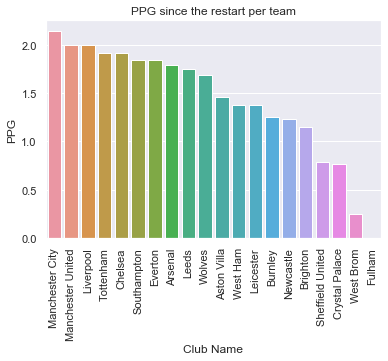

In [470]:
y = form["PPG"].sort_values(ascending = False)
sns.barplot(x = form.index, y = y)
plt.xticks(rotation = 90)
plt.title("PPG since the restart per team")

(0, -1000)

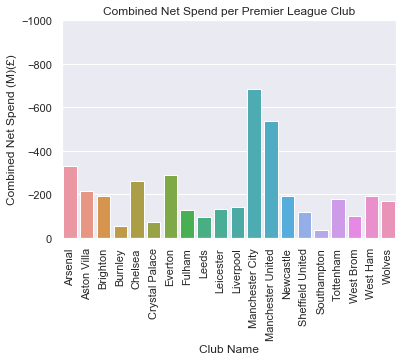

In [455]:
sns.barplot(x = transfers.index, y = transfers["Combined Net Spend (M)(£)"])
plt.xticks(rotation = 90)
plt.title("Combined Net Spend per Premier League Club")
plt.ylim(0, -1000)

Text(0.5, 1.0, 'Squad Value Progress per Premier League Club')

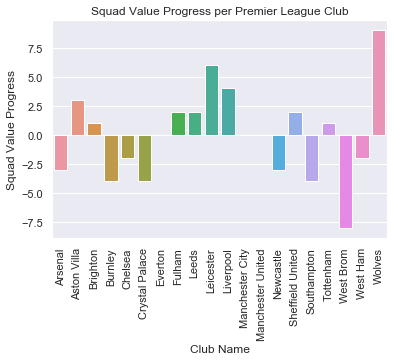

In [456]:
sns.barplot(x = squad_values.index, y = squad_values["Squad Value Progress"])
plt.xticks(rotation = 90)
plt.title("Squad Value Progress per Premier League Club")

([<matplotlib.patches.Wedge at 0x10c609f1808>,
 [Text(-0.7312754422021867, 0.821727587240441, 'Manchester City'),
  Text(-1.087569357633439, -0.5071418858039525, 'Manchester United'),
  Text(0.06395927372182256, -1.0981389763162843, 'Liverpool'),
  Text(0.9969385560680448, -0.4648801086570193, 'Tottenham'),
  Text(0.9682215375394293, 0.5220603932925613, 'Chelsea'),
  Text(0.31548359526460934, 1.0537884517866556, 'Arsenal')],
 [Text(-0.3988775139284654, 0.4482150475856951, '23.1%'),
  Text(-0.634415458619506, -0.2958327667189723, '17.6%'),
  Text(0.03488687657553957, -0.5989848961725187, '20.4%'),
  Text(0.5437846669462062, -0.2535709683583741, '13.9%'),
  Text(0.5281208386578704, 0.2847602145232152, '15.7%'),
  Text(0.17208196105342324, 0.5747937009745393, '9.3%')])

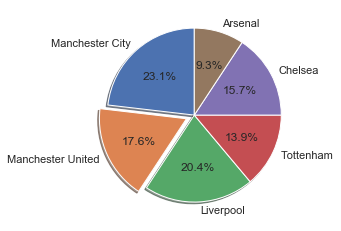

In [460]:
explode = (0, 0.1, 0, 0, 0, 0)
plt.pie(h2h.Total, labels = h2h.index, startangle = 90, 
        shadow = True, explode = explode, autopct='%1.1f%%')

#### Regression to show relationship between net spend and final league placements

In [461]:
frames = [form, placements["Average position"], squad_values["Average Ranking of Squad Value"], 
          squad_values["Squad Value Progress"], transfers["Combined Net Spend (M)(£)"]]
newdf = pd.concat(frames, axis = 1)

In [462]:
newdf.drop(columns = ["P", "W", "D", "L", "GF", "GA", "GD", "PTS"], inplace = True)

In [463]:
newdf

,Position,PPG,Average position,Average Ranking of Squad Value,Squad Value Progress,Combined Net Spend (M)(£)
Manchester City,1,2.15,2.2,1.8,0,-684.48
Manchester United,2,2.00,4.4,3.7,0,-538.96
Liverpool,3,2.00,3.8,3.7,4,-141.60
Tottenham,4,1.92,3.6,5.0,1,-176.46
Chelsea,5,1.92,4.6,2.2,-2,-259.47
Southampton,6,1.85,11.6,10.7,-4,-34.11
Everton,7,1.85,9.2,7.0,0,-289.82
Arsenal,8,1.79,5.2,4.7,-3,-331.11
Leeds,9,1.75,27.4,18.7,2,-96.10
Wolves,10,1.69,20.8,14.5,9,-169.43


In [464]:
newdf.rename(columns = {"Position": "Form Position", "PPG": "Form PPG",
                       "Average position": "Average Position 2020-2015",
                       "Squad Value Progress": "Squad Value Ranking Difference 2020-2015", 
                       "Combined Net Spend (M)(£)": "Combined Net Spend (M)(£) 2020-2015"}, 
           inplace = True)
newdf

,Form Position,Form PPG,Average Position 2020-2015,Average Ranking of Squad Value,Squad Value Ranking Difference 2020-2015,Combined Net Spend (M)(£) 2020-2015
Manchester City,1,2.15,2.2,1.8,0,-684.48
Manchester United,2,2.00,4.4,3.7,0,-538.96
Liverpool,3,2.00,3.8,3.7,4,-141.60
Tottenham,4,1.92,3.6,5.0,1,-176.46
Chelsea,5,1.92,4.6,2.2,-2,-259.47
Southampton,6,1.85,11.6,10.7,-4,-34.11
Everton,7,1.85,9.2,7.0,0,-289.82
Arsenal,8,1.79,5.2,4.7,-3,-331.11
Leeds,9,1.75,27.4,18.7,2,-96.10
Wolves,10,1.69,20.8,14.5,9,-169.43


In [465]:
newdf.describe()

,Form Position,Form PPG,Average Position 2020-2015,Average Ranking of Squad Value,Squad Value Ranking Difference 2020-2015,Combined Net Spend (M)(£) 2020-2015
count,20.00000,20.000000,20.000000,20.000000,20.00000,20.000000
mean,10.50000,1.429000,13.530000,10.530000,0.00000,-206.227500
std,5.91608,0.595597,8.902814,5.638878,3.93366,159.589098
min,1.00000,0.000000,2.200000,1.800000,-8.00000,-684.480000
25%,5.75000,1.210000,5.050000,4.925000,-3.00000,-226.402500
50%,10.50000,1.575000,12.400000,10.950000,0.00000,-172.945000
75%,15.25000,1.867500,19.000000,15.550000,2.00000,-115.002500
max,20.00000,2.150000,32.400000,19.300000,9.00000,-34.110000


In [466]:
import statsmodels.api as sm

In [467]:
y = newdf["Average Position 2020-2015"]
x1 = newdf["Combined Net Spend (M)(£) 2020-2015"]

In [468]:
x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Average Position 2020-2015   R-squared:                       0.250
Model:                                    OLS   Adj. R-squared:                  0.208
Method:                         Least Squares   F-statistic:                     5.992
Date:                        Tue, 27 Oct 2020   Prob (F-statistic):             0.0248
Time:                                14:37:50   Log-Likelihood:                -68.720
No. Observations:                          20   AIC:                             141.4
Df Residuals:                              18   BIC:                             143.4
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  19.2795      2.942      6.553      0.000      13.099      25.460
Combined Net Spend (M)(£) 2020-2015     0.0279      0.011      2.448      0.025       0.004       0.052
==============================================================================
Omnibus:                        1.015   Durbin-Watson:                   1.196
Prob(Omnibus):                  0.602   Jarque-Bera (JB):                0.955
Skew:                           0.429   Prob(JB):                        0.620
Kurtosis:                       2.358   Cond. No.                         429.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

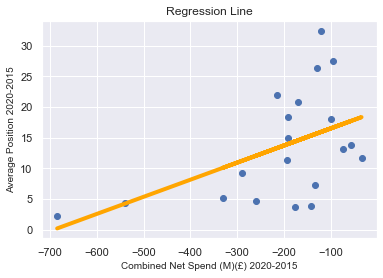

In [469]:
plt.scatter(x1, y)
yhat = 0.0279 * x1 + 19.2795
fig = plt.plot(x1, yhat, lw = 4, c = "orange", label = "Regression Line")
plt.xlabel("Combined Net Spend (M)(£) 2020-2015", fontsize = 10)
plt.ylabel("Average Position 2020-2015", fontsize = 10)
plt.title("Regression Line")
plt.show()